In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os

%matplotlib inline

Firtst we have to load the data that we previously saved in the IDX data format. We split it already into a training and a test dataset. Each of these two datasets comes together with a lables file which we will also load. Finally we generated a .txt file which contains the letter name to each letter ID from the lables file, we also load this one. 

In [2]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename,"r") 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


Since this is the first time we load the daya form the IDX files, let's have a look at some random examples to check if everything makes sense.

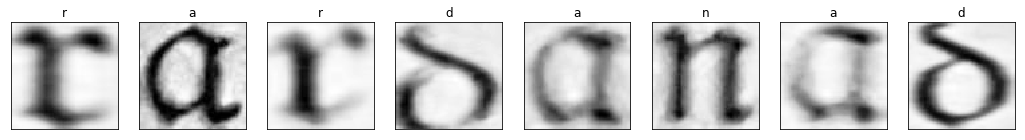

In [3]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[train_labels[image_num]][0])

This looks good. The images contain letters and the lable matches as well.
So next we will train a Multi Layer Perceptron (MLP) on the dataset and see how well it classifies the letters. This approach will follow loosely the code from the [Tensorflow webpage](https://www.tensorflow.org/tutorials/keras/basic_classification).
But before we start building the MLP architecture we have to normalize all images, so that their pixel values span a range from 0 to 1 instead of 0 to 255.

In [4]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# How many categories do we have in the dataset
n_categories = len(class_names)

# What are the dimensions of each image
x_size = train_images.shape[1]
y_size = train_images.shape[2]

So now it is time to build the neural net. We will start with a transformation of the input data from an x by y matrix into a vector of x*y length. This is done with the "keras.layers.Flatten" layer. Then we will add the first actuall layer which is fully connected to the last layer. The last layer has the same amount of neurons in it as we have categories and will tell us via the softmax function which letter the MLP has detected. 

In [6]:
# Design the MLP architecture 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_size, y_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(n_categories, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally let's train the MLP and for 200 epochs.

In [6]:
history = model.fit(train_images, train_labels, epochs=200, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/200
11912/11912 [==============================] - 5s 401us/sample - loss: 0.7279 - acc: 0.8368
Epoch 2/200
11912/11912 [==============================] - 3s 283us/sample - loss: 0.2218 - acc: 0.9441
Epoch 3/200
11912/11912 [==============================] - 3s 285us/sample - loss: 0.1647 - acc: 0.9564
Epoch 4/200
11912/11912 [==============================] - 3s 284us/sample - loss: 0.1516 - acc: 0.9597
Epoch 5/200
11912/11912 [==============================] - 3s 281us/sample - loss: 0.1281 - acc: 0.9668
Epoch 6/200
11912/11912 [==============================] - 3s 280us/sample - loss: 0.1291 - acc: 0.9662
Epoch 7/200
11912/11912 [==============================] - 3s 283us/sample - loss: 0.1008 - acc: 0.9725
Epoch 8/200
11912/11912 [==============================] - 3s 282us/sample - loss: 0.1096 - acc: 0.9701
Epoch 9/200
11912/11912 [==============================] - 3s 280us/sample - loss: 0.0914 - acc: 0.9759
Epoch 10/200
11912/11912 [==============================] - 3s 2

11912/11912 [==============================] - 3s 234us/sample - loss: 0.0512 - acc: 0.9910
Epoch 156/200
11912/11912 [==============================] - 3s 232us/sample - loss: 0.0140 - acc: 0.9961
Epoch 157/200
11912/11912 [==============================] - 3s 234us/sample - loss: 0.0352 - acc: 0.9923
Epoch 158/200
11912/11912 [==============================] - 3s 236us/sample - loss: 0.0305 - acc: 0.9922
Epoch 159/200
11912/11912 [==============================] - 3s 235us/sample - loss: 0.0322 - acc: 0.9928
Epoch 160/200
11912/11912 [==============================] - 3s 242us/sample - loss: 0.0271 - acc: 0.9932
Epoch 161/200
11912/11912 [==============================] - 3s 235us/sample - loss: 0.0074 - acc: 0.9977
Epoch 162/200
11912/11912 [==============================] - 3s 232us/sample - loss: 0.0386 - acc: 0.9907
Epoch 163/200
11912/11912 [==============================] - 3s 236us/sample - loss: 0.0290 - acc: 0.9931
Epoch 164/200
11912/11912 [==============================] -

So after the training is done let's have a quick look on how the loss and accuracy developed over the epochs.

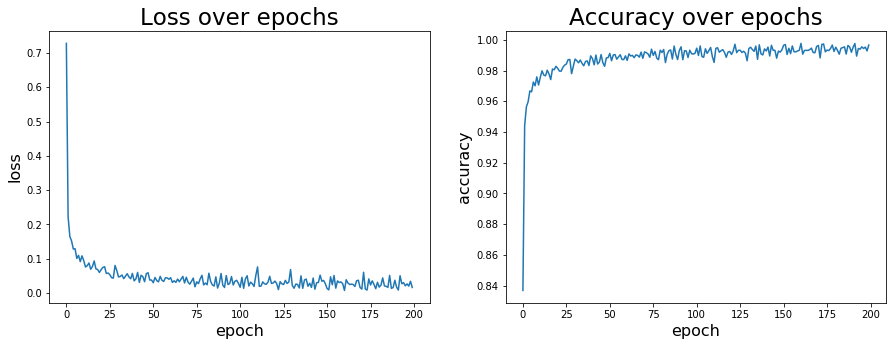

In [7]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

So the training went well, now let's make some predictions with the model on some random examples.
The code we will use for the visualisation can be found in the "plot_data" package within this repository and originates from the [official tensorflow tutorial on MLP classification](https://www.tensorflow.org/tutorials/keras/classification).

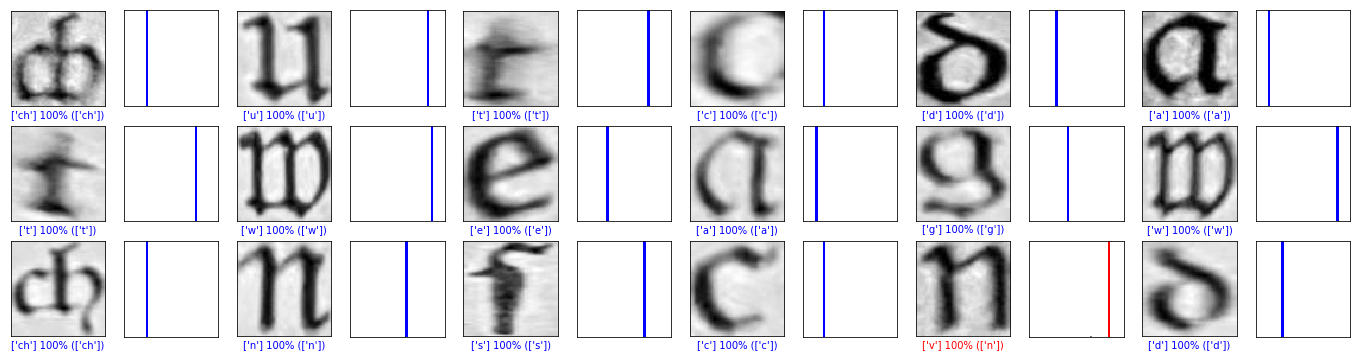

In [8]:
# Use the model to make predictions on the test images
predictions = model.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

Finally after we trained the model and looked at some random predictions we save the model and the weights so that we can load them later for the translation.

In [9]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model.h5")
print("Model saved")

Model saved
